In [ ]:
## KMeans 聚类分析

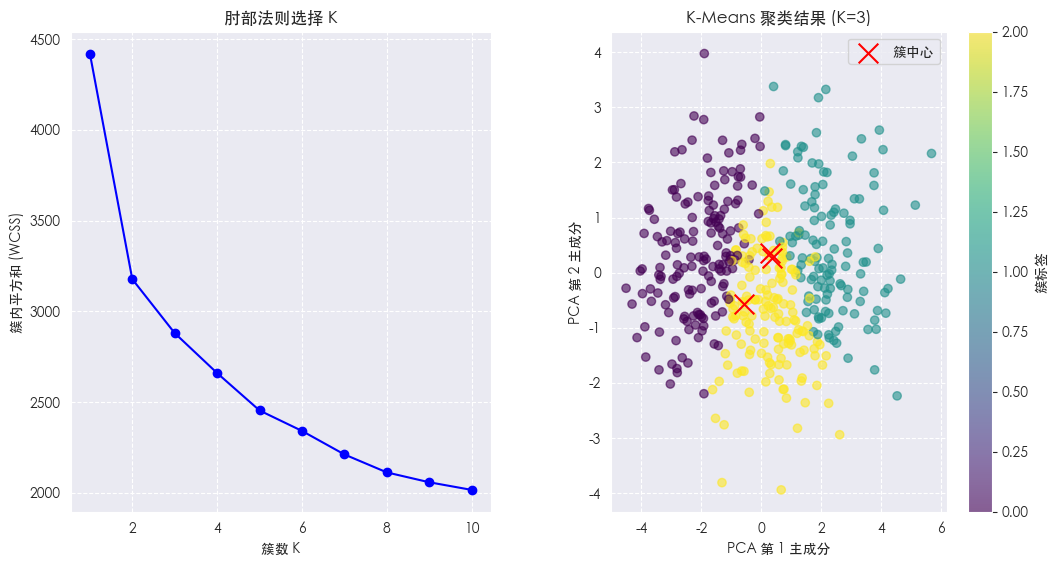

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 设置中文编码
plt.rcParams['font.sans-serif'] = ['STHeiti']
## 设置-号
plt.rcParams['axes.unicode_minus'] = False

# 加载糖尿病数据集（仅使用特征）
diabetes = load_diabetes()
X = diabetes.data

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 计算不同 K 的 WCSS
wcss = []
k_range = range(1, 11)
for k in k_range:
    # n_clusters 几个聚类
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ 是 WCSS

# 使用 K=3 进行聚类（基于肘部法则观察）
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X_scaled)

# PCA 降维到二维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 创建画布
fig = plt.figure(figsize=(12, 6))

# 自由布局：肘部法则曲线
ax1 = fig.add_axes([0.1, 0.1, 0.35, 0.8])
ax1.plot(k_range, wcss, 'b-', marker='o')
ax1.set_xlabel('簇数 K')
ax1.set_ylabel('簇内平方和 (WCSS)')
ax1.set_title('肘部法则选择 K')
ax1.grid(True, ls="--")

# 自由布局：PCA 聚类结果
ax2 = fig.add_axes([0.55, 0.1, 0.35, 0.8])
scatter = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='簇中心')
ax2.set_xlabel('PCA 第 1 主成分')
ax2.set_ylabel('PCA 第 2 主成分')
ax2.set_title('K-Means 聚类结果 (K=3)')
ax2.legend()
ax2.grid(True, ls="--")
plt.colorbar(scatter, ax=ax2, label='簇标签')

plt.show()